# Chapter10 로지스틱 회귀 심화
데이터 과학을 위한 파이썬 머신러닝

- <a href="#10.1다중클래스분류와소프트맥스분류">10.1 다중클래스 분류와 소프트맥스 분류</a>
- <a href="#10.2다중클래스분류를코드로구현하기">10.2 다중클래스 분류를 코드로 구현하기</a>
- <a href="#10.3ROC커브와AUC">10.3 ROC 커브와 AUC</a>

[참고] TeX 기호: https://ko.wikipedia.org/wiki/%EC%9C%84%ED%82%A4%EB%B0%B1%EA%B3%BC:TeX_%EB%AC%B8%EB%B2%95

------------------

## <a name="10.1다중클래스분류와소프트맥스분류">10.1 다중클래스 분류와 소프트맥스 분류</a>

### 1. 다중클래스 분류의 개념
- 다중클래스 분류(multi-class classification) : 2개 이상의 클래스를 가진 y 값에 대한 분류



#### 1.1 다중클래스와 다중레이블

| 분류 |다중클래스(multi-class) 분류 | 다중레이블(multi-label) 분류 | 
|:---|:---|:---|
|특징 |하나의 샘플은 하나의 레이블을 갖는다.<br>One Sample to One Label |하나의 샘플은 여러 개의 레이블을 가질 수 있다.<br>One Sample to Multi-Label |
|작업 | 2개 이상의 클래스를 가진 분류 작업| 상호 배타적이지 않은 속성 예측 |
|중복 선택 | 중복 선택 불가능<br>->[1 0 0]가능, [1 1 0]불가 |중복 선택 가능<br>->[1 1 0]가 |
|예 |과일 사진 분류:오렌지, 사과 배 |신문기사 분류: 운동선수-연예인 결혼 기사 <br>-> 스포츠/연예 면 |


### # Binary Classification
**examples**<br>
- Email Spam detection: Normal State – Not Spam, Abnormal State – Spam
- Conversion prediction: Normal State – Not churned, Abnormal State – Churn
- Conversion Prediction: Normal State – Bought an item, Abnormal State – Not bought an item<br>

**The most popular algorithm** <br>
- K-Nearest Neighbours
- Logistic Regression
- Support Vector Machine
- Decision Trees
- Naive Bayes

(5000, 2) (5000,)
Counter({1: 2500, 0: 2500})
[-11.5739555  -3.2062213] 1
[0.05752883 3.60221288] 0
[-1.03619773  3.97153319] 0
[-8.22983437 -3.54309524] 1
[-10.49210036  -4.70600004] 1
[-10.74348914  -5.9057007 ] 1
[-3.20386867  4.51629714] 0
[-1.98063705  4.9672959 ] 0
[-8.61268072 -3.6579652 ] 1
[-10.54840697  -2.91203705] 1


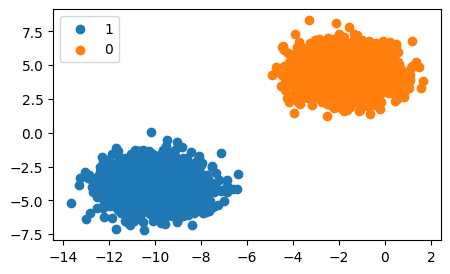

In [2]:
# scikit-learn 가상 데이터 생성 함수
# - make_blob & make_classification 
# - make_blob() : function of the scikit-learn module to generate a binary classification dataset
from numpy import where
from collections import Counter
from sklearn.datasets import make_blobs
from matplotlib import pyplot
pyplot.rcParams['figure.figsize'] = (5,3)

X, y = make_blobs(n_samples=5000, centers=2, random_state=1)
print(X.shape, y.shape)
counter = Counter(y)
print(counter)
for i in range(10):
    print(X[i], y[i])
for label, _ in counter.items():
    row_ix = where(y == label)[0] # 조건에 맞는 인덱스값 반환
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

### # Multi-Class Classification
**examples**<br>
- Plant Species Classification
- Face Classification
- Optical Character recognition

**The most popular algorithm** <br>
- K-Nearest Neighbours
- Naive Bayes
- Decision trees
- Gradient Boosting
- Random Forest

(1000, 2) (1000,)
Counter({1: 250, 2: 250, 0: 250, 3: 250})
[-10.45765533  -3.30899488] 1
[-5.90962043 -7.80717036] 2
[-1.00497975  4.35530142] 0
[-6.63784922 -4.52085249] 3
[-6.3466658  -8.89940182] 2
[-4.67047183 -3.35527602] 3
[-5.62742066 -1.70195987] 3
[-6.91064247 -2.83731201] 3
[-1.76490462  5.03668554] 0
[-8.70416288 -4.39234621] 1


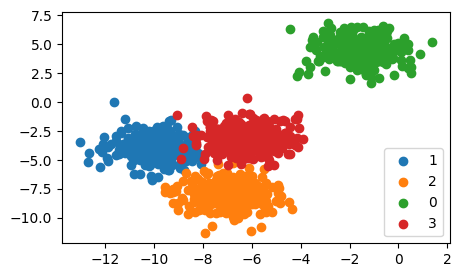

In [3]:
from numpy import where
from collections import Counter
from sklearn.datasets import make_blobs
from matplotlib import pyplot

X, y = make_blobs(n_samples=1000, centers=4, random_state=1)
print(X.shape, y.shape)
counter = Counter(y)
print(counter)
for i in range(10):
    print(X[i], y[i])
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

### # Multi-Label Classification
**examples**<br>
- photo classification : a single photo can have multiple objects in it like a dog or an apple and etcetera

**The most popular algorithm** <br>
- Multi-label Random Forests
- Multi-label Decision trees
- Multi-label Gradient Boosting

In [4]:
from sklearn.datasets import make_multilabel_classification

X, y = make_multilabel_classification(n_samples=1000, n_features=3, n_classes=4, n_labels=4, random_state=1)
print(X.shape, y.shape)
for i in range(10): 
    print(X[i], y[i])

(1000, 3) (1000, 4)
[ 8. 11. 13.] [1 1 0 1]
[ 5. 15. 21.] [1 1 0 1]
[15. 30. 14.] [1 0 0 0]
[ 3. 15. 40.] [0 1 0 0]
[ 7. 22. 14.] [1 0 0 1]
[12. 28. 15.] [1 0 0 0]
[ 7. 30. 24.] [1 1 0 1]
[15. 30. 14.] [1 1 1 1]
[10. 23. 21.] [1 1 1 1]
[10. 19. 16.] [1 1 0 1]


### # Imbalanced Classification
불균형 분류는 각 클래스의 예제 수가 불균등하게 분포된 작업에 대한 분류<br>
(훈련 데이터 세트의 대부분이 정상 클래스 유형이고 소수가 비정상 클래스에 속하는 이진 분류 작업인 경우)<br>
특히, 비용에 민감한 기계 학습 모델을 포함하는 교육 데이터 세트에 모델을 적용할 때 소수 클래스에 더 많은 주의를 기울이기 위해 특수 모델링 알고리즘을 사용할 수 있다.<br> 아래의 경우 <br>
- Cost-Sensitive Logistic Regression
- Cost-Sensitive Decision Trees
- Cost-Sensitive Support Vector Machine

**examples**<br>
- Fraud Detection(사기 탐지)
- Outlier Detection(이상치 감지)
- Medical Diagnosis Test(의료 진단 테스트)

**The most popular algorithm** <br>
- Random Undersampling
- SMOTE Oversampling



**make_classification()**<br>
- n_samples : 표본 데이터의 수, 디폴트 100
- n_features : 독립 변수의 수, 디폴트 20
- n_informative : 독립 변수 중 종속 변수와 상관 관계가 있는 성분의 수, 디폴트 2
- n_redundant : 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수, 디폴트 2
- n_repeated : 독립 변수 중 단순 중복된 성분의 수, 디폴트 0
- n_classes : 종속 변수의 클래스 수, 디폴트 2
- n_clusters_per_class : 클래스 당 클러스터의 수, 디폴트 2
- weights : 각 클래스에 할당된 표본 수
- random_state : 난수 발생 시드

(1000, 2) (1000,)
Counter({0: 983, 1: 17})
[0.86924745 1.18613612] 0
[1.55110839 1.81032905] 0
[1.29361936 1.01094607] 0
[1.11988947 1.63251786] 0
[1.04235568 1.12152929] 0
[1.18114858 0.92397607] 0
[1.1365562  1.17652556] 0
[0.46291729 0.72924998] 0
[0.18315826 1.07141766] 0
[0.32411648 0.53515376] 0


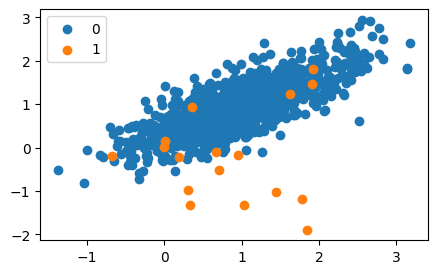

In [5]:
from numpy import where
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot

X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_classes=2, n_clusters_per_class=1, weights=[0.99,0.01], random_state=1)
print(X.shape, y.shape)
counter = Counter(y)
print(counter)
for i in range(10):
    print(X[i], y[i])
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

#### 1.2 분류 접근
다중클래스(Multi-Class)분류 문제를 다룰 때 두가지 접근법

|One-vs-All | One-vs-One|
|:---|:---|
| m개의 클래스가 존재할 때 각 클래스마다 분류기(classifier)를 생성하여 분류|m개의 클래스가 있다면, 이 클래스의 분류기를 하나의 클래스로 하고 나머지 클래스의 분류기들을 만들어 최종적으로 각 분류기들의 결과를 투표로 결정 |
| One-vs-Rest라고도 부름| ${ {m(m-1)} \over 2}$ |
| 대표적으로 소프트맥스 분류(softmax classification)|분류기가 많아질수록 정확도 높아지지만 비용도 증가 |

<img src="https://miro.medium.com/v2/resize:fit:786/format:webp/1*RElrybCZ4WPsUfRwDl7fqA.png" width="400" height="400"/>

<img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*4xjYPBsT9ZHOe3u0MIRB2A.jpeg" width="300" height="300"/>

In [ ]:
#Import LogisticRegression() model from scikit_learn
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#define dataset
X_train, y_train = make_classification(n_samples=500, n_features=8, 
                                       n_informative=5, n_redundant=3, 
                                       n_classes=3, random_state=1)

#define classification model
Multiclass_model = LogisticRegression(multi_class='ovr')

#fit model
Multiclass_model.fit(X_train, y_train)

#make final predictions
y_pred = Multiclass_model.predict(X_train)

accuracy_score(y_train, y_pred)

### 2. 소프트맥스 분류

#### 2.1 소프트맥스 함수(softmax function)

**시그모이드 함수로 다중클래스 분류 문제 다룰 수 있음** <br>
- 각각의 클래스에 속하는지 속하지 않는지 이진분류기 m개를 생성한 후, 가장 높은 확률이 나오는 클래스를 선택
- 분류기 번호 m에 대해  $h_m(x:\theta)$로 표현
- 그러나$h_m(x:\theta)$ 확률의 합이 1 이상이 된다는 문제 발생
- 문제 해결 방법은 모든 클래스들의 발생 확률을 1로 정규화 <br>

**소프트맥스 함수(softmax function)** : 다중클래스 분류에서 여러 선형회귀의 출력 결과를 정규화하여 합이 1이 되도록 만드는 함수 사용 <br>

 $\sigma(z)_j = {e^{zj} \over {\sum_{k=1}^K} e^{zk}}$ for j=1,2,3,...,K<br>
 
 $\sum_{j=1}^K \sigma(z)_j$ = $\sum_{j=1}^K P_j$ = 1



In [6]:
import numpy as np

def softmax(values):
    array_values = np.exp(values)
    return array_values / np.sum(array_values)

values = [2, 1, 5, 0.5]
y = softmax(values) # array([0.04613281, 0.01697131, 0.92660226, 0.01029362])
print(y)
y.sum() 

[0.04613281 0.01697131 0.92660226 0.01029362]


1.0

#### 2.2 소프트맥스 함수로 구현하는 소프트맥스 분류


- 오즈비에 logit 함수를 붙여 최종적으로 구한 가중치($w=\theta)$ 값<br>
 ${P_j \over {1-P_j}} => logit(P_j) = log_e({P_j \over {1-P_j}}) = z = \theta^t X$  <br>
- 기존의 오즈비는 이진분류이지만, 다중클래스 분류는 j번째 대상에 대한 전체 대비 비율을 나타냄<br>
 ${P_j \over P_k} => log\bar{y}(P_j) = log_e({P_j \over p_k}) = z_j = X^t{\theta_j}$ <br>
 
 ${P_j \over P_k} = e^{zj}$ => ${P_j \over {\sum_{j=1}^K e^{zj}} }$ = $e^{zj}$ => $P_k = {1 \over {\sum_{j=1}^K e^{zj}} }$<br>
 
  $P_j = {e^{x^T{\theta_j}} \over {\sum_{j=1}^K} e^{X^T{\theta_j}} }$ 


### 3. 소프트맥스 함수로 학습하기



- 오른쪽 수식에서 θ를 학습   $P_j = {e^{x^T{\theta_j}} \over {\sum_{j=1}^K} e^{X^T{\theta_j}} }$  
- 즉 각 클래스마다 적절한 $\theta_j$를 찾기
- 각 가설함수는 각 클래스와 발생확률로 표현 가능
- 최대우도추정법(Maximum Likelihood Estation, MLE)을 사용해서 $P_j$확률을 최대화하는 θ를 찾기
- $arg_{\theta}max \prod_{i=1}^m P(y^i|x^i;\theta)$
- 위 수식을 손실(loss)로 생각하여 수식 L로 표현하고 해당 값을 최대화하는 방향으로 정리

---------

## <a name="10.2다중클래스분류를코드로구현하기">10.2 다중클래스 분류를 코드로 구현하기</a>

### 1. mnist 데이터셋의 이해

#### 손글씨를 숫자로 인식하는 이미지 분류 문제

<img src="https://github.com/Joyschool/gachon-ml/blob/main/image/fig10-1.jpg?raw=true" width="400" height="400"/>

#### 컴퓨터는 이미지를 일종의 숫자로 변환하여 인식
- 이미지를 일종의 점(dot)으로 생각하면 m×n만큼의 공간이 존재하고, 그 공간 안에서 색깔이 진할수록 높은 값, 색깔이 옅을수록 낮은 값을 가짐

### 2. 데이터 불러오기

In [7]:
# datasets 모듈을 호출
# load_digits 함수로 딕셔너리 타입 데이터를 불러온다
from sklearn import datasets

digit_dataset = datasets.load_digits()
digit_dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [8]:
digit_dataset["images"].shape

(1797, 8, 8)

In [9]:
digit_dataset["target"][0]

0

In [10]:
digit_dataset["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

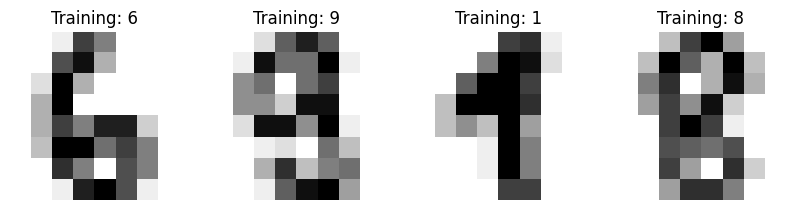

In [11]:
import matplotlib.pyplot as plt
from random import randint
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3)) # (1)

for ax in axes: # (2)
    num = randint(1, 1000) # (3)
    image = digit_dataset["images"][num]
    label = digit_dataset["target"][num] 
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest') # (4)
    # cmap: gray_r, plasma, Greens
    #ax.imshow(image, cmap=plt.cm.Greens, interpolation='nearest')
    ax.set_title('Training: %i' % label)


- 참고(cmap종류) :  https://jrc-park.tistory.com/155

In [12]:
# 8×8 행렬 : 총 64개의 피쳐(feature)를 가진 하나의 데이터로 받을 수 있음
digit_dataset["data"][0].shape

(64,)

### 3. 데이터 분류하기

In [13]:
# 데이터를 훈련 데이터셋과 테스트 데이터셋으로 구분
from sklearn.model_selection import train_test_split

X = digit_dataset["data"] # (1)
y = digit_dataset["target"] # (1)
X_train, X_test, y_train, y_test = train_test_split(X, y) # (2)


### 4. 모델 생성하기

- ovr(one-vs-all) : 클래스 모드를 모두 이진모델로 만들어 학습
- multinomial : 소프트맥스 함수를 사용하여 계산하는 방식. 경사하강법의 매개변수 solver를 sag으로 변경

In [15]:
from sklearn.linear_model import LogisticRegression

logreg_ovr = LogisticRegression(multi_class="ovr")
logreg_softmax = LogisticRegression(multi_class="multinomial",
                                    solver="sag") # Stochastic Average Gradient 

logreg_ovr.fit(X_train, y_train)
logreg_softmax.fit(X_train, y_train)


C:\python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(multi_class='multinomial', solver='sag')

### 5. 성능 측정하기

- 일반적으로 다중클래스 분류도 기존 혼동행렬을 사용
- 각 클래스 대비 예측한 값을 행렬 형태로 표현

In [16]:
from sklearn.metrics import confusion_matrix
y_pred = logreg_ovr.predict(X_test).copy()
y_true = y_test.copy()
confusion_matrix(y_true, y_pred)

array([[41,  0,  0,  0,  0,  0,  0,  1,  1,  0],
       [ 0, 52,  0,  0,  0,  0,  1,  0,  2,  1],
       [ 0,  0, 45,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 53,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 39,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 48,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 48,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  0],
       [ 0,  3,  0,  1,  0,  0,  0,  0, 39,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  1,  1, 29]], dtype=int64)

In [17]:
from sklearn.metrics import confusion_matrix
y_pred2 = logreg_softmax.predict(X_test).copy()
y_true = y_test.copy()
confusion_matrix(y_true, y_pred2)

array([[41,  0,  0,  0,  0,  0,  2,  0,  0,  0],
       [ 0, 53,  0,  0,  0,  0,  1,  0,  1,  1],
       [ 0,  0, 46,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 53,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 39,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 47,  0,  0,  0,  2],
       [ 0,  2,  0,  0,  0,  0, 46,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  1],
       [ 0,  2,  0,  2,  0,  1,  0,  0, 38,  0],
       [ 0,  0,  0,  0,  1,  1,  0,  0,  1, 29]], dtype=int64)

In [19]:
# 라벨별로 분류 성능을 수치화하여 표시
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.95      0.93      0.94        56
           2       1.00      0.98      0.99        46
           3       0.96      1.00      0.98        53
           4       1.00      1.00      1.00        39
           5       0.98      0.96      0.97        50
           6       0.98      1.00      0.99        48
           7       0.95      1.00      0.98        40
           8       0.91      0.91      0.91        43
           9       0.91      0.91      0.91        32

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450



In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.93      0.95      0.94        56
           2       1.00      1.00      1.00        46
           3       0.95      1.00      0.97        53
           4       0.97      1.00      0.99        39
           5       0.96      0.94      0.95        50
           6       0.94      0.96      0.95        48
           7       1.00      0.97      0.99        40
           8       0.95      0.88      0.92        43
           9       0.88      0.91      0.89        32

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450



- micro를 선택하면 전체 평균값, 
- macro를 선택하면 각 라벨별 결과의 합에 대한 평균을 나타냄

In [21]:
result = confusion_matrix(y_true, y_pred)
result.diagonal().sum() / result.sum(axis=0).sum()

0.9644444444444444

In [22]:
# micro를 선택하면 전체 평균값
from sklearn.metrics import precision_score
precision_score(y_true, y_pred, average="micro")

0.9644444444444444

In [23]:
# macro를 선택하면 각 라벨별 결과의 합에 대한 평균을 나타냄
precision_score(y_true, y_pred, average="macro") 

0.9633882279127295

In [24]:
precision_score(y_true, y_pred, average=None)

array([1.        , 0.94545455, 1.        , 0.96363636, 1.        ,
       0.97959184, 0.97959184, 0.95238095, 0.90697674, 0.90625   ])

------------

## <a name="10.3ROC커브와AUC">10.3 ROC 커브와 AUC</a>

### 1. 정밀도와 민감도의 트레이드오프

- **정밀도(precision)와 민감도(recall)는 일반적으로 둘 다 동시에 상승하기 어렵고 임계값(threshold)에 따라 변화가 일어남**<br>
 -두 값을 모두 고려하여 성능을 측정하기 쉽지 않음<br>
  * 정밀도(precision) : 모델이 1이라고 예측했을 때 얼마나 잘 맞을지에 대한 비율 
  * 민감도(recall) : (재현율)실제 1인 값을 가진 데이터를 모델이 얼마나 1이라고 잘 예측했는지에 대한 비율 <br>
<br>  
- **ROC 커브(ROC curve) : 분류기의 임계값을 지속적으로 조정하여 정밀도와 민감도 간의 비율을 도식화**<br>
  * ‘Receiver Operating Characteristics’의 약자<br>
  * 클래스의 예측 확률이 나오는 모델에 사용 가능


### 2. ROC 커브 표현하기

<img src="https://github.com/Joyschool/gachon-ml/blob/main/image/fig9-8.jpg?raw=true" width="300" height="300"/>

- TPR(True Positive Rate)과 FPR(False Positive Rate)을 각각 y축, x축에 나타내어 그래프를 작성
- **AUC(Area Under Curve)** : ROC 커브 하단의 넓이
 - - 대표적인 ROC 커브로 **모델들의 성능을 단 하나의 숫자로 표현**할 수 있다는 점에서 불균형 데이터셋(imbalanced dataset)의 성능을 평가할 때 많이 사용


### 3. ROC 커브와 AUC를 사이킷런 코드로 구현하기

In [25]:
# 정답 y 값과 각 항목별 예측 확률을 scores에 저장
# ROC 커브 함수인 roc_curve로 fpr, tpr, thresholds 반환
import numpy as np
from sklearn import metrics

y = np.array([1, 1, 2, 2])
scores = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)

# fpr - array([0. , 0. , 0.5, 0.5, 1. ])
# tpr - array([0. , 0.5, 0.5, 1. , 1. ])
# thresholds - array([1.8 , 0.8 , 0.4 , 0.35, 0.1 ])

In [26]:
y = np.array([1, 1, 2, 2])
pred = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=2)
roc_auc = metrics.auc(fpr, tpr)
roc_auc

0.75

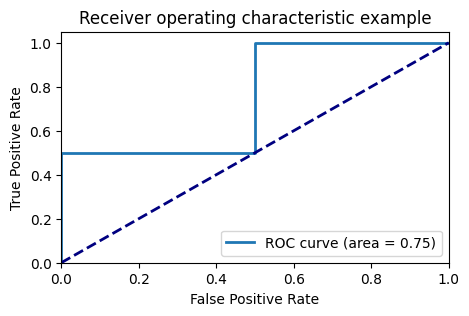

In [27]:
import matplotlib.pyplot as plt

plt.figure()
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

------------------

THE END